### Chapter 1. 데이터 전처리

1. 데이터 불러오기
2. 데이터 타입 확인
3. 데이터 결측치 확인 (데이터 정제 I)
4. 데이터 결측치 대체 (데이터 정제 II)
5. 데이터 합치기
6. 데이터 인덱싱
7. 이탈 데이터 전처리 : 일별 데이터 -> 월별 데이터

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint

import os

### 경로 관련

In [2]:
# 현재 프로세스의 작업 디렉토리 확인
cur_dir = os.getcwd()
print(cur_dir)

# 현재 작업파일의 경로에 있는 리스트 확인 -> 리스트로 반환
dir_list = os.listdir(cur_dir)
print(dir_list)

# 특정 경로의 폴더(디렉토리) 생성
# os.mkdir('test2')

# os.mkdir(cur_dir + '/tt')

# 지정한 파일의 이름을 변경
# os.rename('test33333333', 'test2')

# 지정된 경로의 디렉토리를 순차적으로 탐색 -> 주로 for문과 활용
# 경로, 폴더, 파일 형식으로 출력됨
for dirpath, folder, file in os.walk(cur_dir):
    print(dirpath, '\n', folder, '\n', file)

c:\Users\hslio\Desktop\Github\Genia\Study
['chapter 1. 데이터 전처리-샘플 데이터.ipynb', 'chapter 1. 실습용 코드.ipynb', 'chapter 1. 실습용 코드_answer.ipynb', 'data']
c:\Users\hslio\Desktop\Github\Genia\Study 
 ['data'] 
 ['chapter 1. 데이터 전처리-샘플 데이터.ipynb', 'chapter 1. 실습용 코드.ipynb', 'chapter 1. 실습용 코드_answer.ipynb']
c:\Users\hslio\Desktop\Github\Genia\Study\data 
 ['bank', 'Dropout', 'penguin'] 
 []
c:\Users\hslio\Desktop\Github\Genia\Study\data\bank 
 [] 
 ['BankChurners.csv', '테이블명세서_cards.csv']
c:\Users\hslio\Desktop\Github\Genia\Study\data\Dropout 
 [] 
 ['df1.csv', 'df2.csv', 'df3.csv', 'df4.csv', 'Dropout.csv', 'member.csv', '테이블명세서_dropout.csv']
c:\Users\hslio\Desktop\Github\Genia\Study\data\penguin 
 [] 
 ['penguins_lter.csv', 'penguins_size.csv', '테이블명세서_penguin.csv']


### 특정 경로의 파일 리스트 확인

In [3]:
# path = 'D:/천재교육/2308_실무자특강_실습/'
path = cur_dir + '\\data\\'

In [4]:
# data_list = os.listdir('Dropout')[0:-1]
data_list = os.listdir(path + 'Dropout')[0:-1]
print("데이터셋 목록(data_list) : ", data_list)

데이터셋 목록(data_list) :  ['df1.csv', 'df2.csv', 'df3.csv', 'df4.csv', 'Dropout.csv', 'member.csv']


### 데이터 불러오기 type 1 -> dict 형태로 반환

In [5]:
dataset = dict()

for data in data_list:
    dataset[data[0:-4]] = pd.read_csv(path + f'\\Dropout\\{data}', encoding='cp949')

In [6]:
dataset.keys()

dict_keys(['df1', 'df2', 'df3', 'df4', 'Dropout', 'member'])

### 데이터 불러오기 type 2 -> dataframe 형태로 각각 반환

In [ ]:
for i in dataset.keys():
    print(f'{i}😗')
    display(dataset[i])

### 데이터 합치기

In [ ]:
dropout = pd.merge(dataset['member'], dataset['df1'], right_on='ID', left_on='ID')
dropout = pd.merge(dropout, dataset['df2'], right_on='ID', left_on='ID')
dropout = pd.merge(dropout, dataset['df3'], right_on='ID', left_on='ID')
dropout = pd.merge(dropout, dataset['df4'], right_on='ID', left_on='ID') 

### 테이블 컬럼 타입 확인

In [ ]:
dropout.dtypes

### 데이터프레임 내의 값 변경

In [ ]:
def change_value(values):
    if values == 'Portuguese':
        return 1
    elif values == 'German':
        return 2
    elif values == 'Spanish':
        return 3
    elif values == 'Italian':
        return 4
    elif values == 'Dutch':
        return 5
    elif values == 'English':
        return 6
    elif values == 'Lithuanian':
        return 7
    elif values == 'Angolan':
        return 8
    elif values == 'Cape Verdean':
        return 9
    elif values == 'Guinean':
        return 10
    elif values == 'Mozambican':
        return 11
    elif values == 'Santomean':
        return 12
    elif values == 'Turkish':
        return 13
    elif values == 'Brazilian':
        return 14
    elif values == 'Romanian':
        return 15
    elif values == 'Moldova':
        return 16
    elif values == 'Mexican':
        return 17
    elif values == 'Ukrainian':
        return 18
    elif values == 'Russian':
        return 19
    elif values == 'Cuban':
        return 20
    elif values == 'Colombian':
        return 21

def change_value2(values):
    if values == 'Female':
        return 0
    elif values == 'Male':
        return 1

def change_value3(values):
    if values == 'Graduate':
        return 0
    elif values == 'Dropout':
        return 1
    elif values == 'Enrolled':
        return 2


In [ ]:
dropout

In [ ]:
dropout.Target.value_counts()

### 데이터 값 변경 version 1 -> 함수/apply 사용

In [ ]:
# dropout['Nacionality'] = dropout['Nacionality'].apply(change_value)
# dropout

### 데이터 컬럼 추가

#### - 빈 컬럼 생성 version 1
-> DataFrame['추가하고 싶은 컬럼명'] = '컬럼값'

In [ ]:
# dropout['Nationality'] = 0

#### - 빈 컬럼 생성 version 2
-> insert(loc = 넣고 싶은 새로운 컬럼의 위치, column = 추가하고 싶은 새로운 컬럼명, value = 새로운 컬럼의 값)

In [ ]:
# dropout.insert(loc = 2, column = 'Nationality_re', value = 999)
# dropout.drop(['Nationality_re', 'Nationality'], axis=1, inplace=True)

In [ ]:
# Nationality를 만들면서 Nacionality 값에 함수 적용한 값 넣기
dropout.insert(loc = 2, column = 'Nationality', value = dropout['Nacionality'].apply(change_value))
dropout.drop(['Nacionality'], axis=1, inplace=True)
# Gender 수치화
dropout['Gender'] = dropout['Gender'].apply(change_value2)
# Target 수치화
dropout['Target'] = dropout['Target'].apply(change_value3)

In [ ]:
dropout

### 데이터 값 변경 version 2 -> loc 사용

In [ ]:
# dropout.loc[dropout['Nationality'] == 'Portuguese', 'Nationality'] = 1

In [ ]:
dropout.head()

### 컬럼별 중복 제거 개수

In [ ]:
columns_info = dict()
columns = dropout.columns

for col in columns:
    columns_info[col] = len(dropout[col].unique())

pprint(columns_info, sort_dicts=False)

### 데이터 컬럼 탐색

In [ ]:
# dropout = dropout.rename(columns = {'Nacionality' : 'Nationality'})
dropout_action_cnt = dropout.groupby(['Nationality', 'Target']).size().reset_index().pivot(columns='Target', index='Nationality', values=0)
dropout_action_cnt = dropout_action_cnt.rename(index = {1:'포르투칼', 2:'독일'})

In [ ]:
dropout_action_cnt

### 데이터 컬럼 타입 변경

In [ ]:
dropout = dropout.astype({"Marital status" : 'object',
                         "Application mode" : 'object',
                         "Course" : 'object',
                         "Daytime/evening attendance" : 'object',
                         "Previous qualification" : 'object',
                         "Mother's qualification" : 'object',
                         "Father's qualification" : 'object',
                         "Mother's occupation" : 'object',
                         "Father's occupation" : 'object',
                         "Displaced" : 'object',
                         "Educational special needs" : 'object',
                         "Debtor" : 'object',
                         "Tuition fees up to date" : 'object',
                         "Scholarship holder" : 'object',
                         "International" : 'object'})
dropout.info()

### 결측치 확인
- 컬럼별 결측 비율 확인

In [ ]:
round((dropout.isnull().sum()/len(dropout)) * 100, 2)

# ------------------------------------------------------------------------------------------------------------

## 결측치 처리

###  머신러닝 및 데이터 분석에서 상황과 목적에 맞게 처리해야 하는 중요한 프로세스 중 하나



1. 결측치 비율이 10% 미만인 경우
- 삭제 가능
<p>


2. 결측치 비율이 30% ~ 50%인 경우
- 삭제 위험
<p>


3. 결측치 비율이 50% 이상인 경우
- 데이터 자체에 대한 추가 검증 필요 or 해당 컬럼의 제거 고려
<p> 
    
==============================
### * 결측치를 처리하는 방법은 다양
    
1. 제거
- 한개 이상의 결측치가 있는 모든 행 제거
    
2. 대치
- 결측치를 특정값(평균, 최소, 최대, 최반값 등등)으로 대체
    
3. 보간법
- 추세를 결측치 이외의 값들을 선형적으로 같은 간격으로 처리 (시계열 데이터에 적합)

#### Target 변수에 결측치가 있는 행 일괄 제거
- target 변수에는 결측치가 있어서는 안된다!!!

In [ ]:
# target 변수의 결측치 유무 확인 -> 데이터프레임 형태로 번환 후 확인

null_cnt_df = pd.DataFrame(dropout.isnull().sum()).rename(columns={0 : 'null_count'}).reset_index()
null_cnt_df['null_ratio'] = round((null_cnt_df['null_count'] / len(dropout))*100 , 2)
null_cnt_df

In [ ]:
print('Target 결측치 제거 전')
display(dropout[dropout['Target'].isna()])

# 결측치 제거
dropout.dropna(subset='Target', inplace=True)

print('Target 결측치 제거 후')
display(dropout[dropout['Target'].isna()])
print(dropout.shape)

## * 결측치 1차 제거 -> 행 제거

- dropna() 함수 사용
1. axis = 0/1 (0 : 행, 1 : 열)
2. how = 'any' / 'all' (any : 행/열 중 하나라도 있는 경우 제거, all : 모든 행/열이 결측인 경우 제거)

3. dropna(thresh = num) : 행의 결측치 개수가 num개 이상인 행 제거

4. subset = 특정 변수 지정 / 지정하지 않을 경우 : 모든 columne & row에 적용

In [ ]:
# 행을 기준으로 결측치가 2개 이상인 행 제거
nu_2 = (dropout.isnull().sum(axis=1) >= 2).sum()
print(f'행 기준 결측치 2개 이상인 row 개수 : {nu_2}')
print(f'결측치 제거 전 dropout shape : {dropout.shape}')

# 현재 비둘기 머리를 돌리기 위해 넘어가자
# dropout = dropout.dropna(thresh=2)
# print(f'결측치 제거 후 dropout shape : {dropout.shape}')

dropout_ = dropout[~(dropout.isnull().sum(axis=1) >= 2)]
print(f'결측치 제거 후 dropout shape : {dropout_.shape}')


In [ ]:
null_cnt_df = pd.DataFrame(dropout_.isnull().sum()).rename(columns={0 : 'null_count'}).reset_index()
null_cnt_df['null_ratio'] = round((null_cnt_df['null_count'] / len(dropout_))*100 , 2)
null_cnt_df

In [ ]:
# 행당 Null값 2개 이상인 애들 확인
(dropout_.isnull().sum(axis=1) >= 2).sum()

In [ ]:
# 행을 기준으로 모두 결측인 case 제거

# 모든 행이 Null인 경우, 즉 행을 기준으로 Null 값이 Column 수와 같으면 제거
(dropout.isnull().sum(axis=1) >= 36).sum()

# 발견되지 않음 

In [ ]:
# 약 4천개의 행중에서 3000개 이상 결측인 컬럼 제거 -> "Education" 컬럼 제거 됨
# 열 기준 3000개 이상 Null값 가진 컬럼 있는지 확인 출력
print(dropout_.isnull().sum(axis=0) >= 3000)
# 3000 이상 제거
dropout_.dropna(thresh=3000, axis=1, inplace=True)
dropout_

In [ ]:
dropout_.info()

## * 결측치 특정값 대치(imputation)

1. 최빈값 : 범주형 변수의 경우 (가장 비율이 높은 범주로 대치 가능)

2. 중앙값 : 연속형 변수의 경우 중앙값으로 대치 가능

3. 평균 : 연속형 변수의 경우 평균값으로 대치 가능

4. 임의 지정 : 사용자가 원하는 수치로 대치 가능

### 특정값 대치 version 1 -> fillna() 함수 사용

#### 타입별 컬럼 리스트 재정의
- 1. float64 타입에 해당하는 컬럼 리스트 반환
- 2. Object 타입에 해당하는 컬럼 리스트 반환

In [ ]:
dropout = dropout_

In [ ]:
# 각 타입별 컬럼 리스트를 딕셔너리 형태로 반환

# ex) {'object' : ['col1', 'col2'...], 'float64' : ['col3', 'col4'...]}
type_lst = dict({'Object': [], 'Float64' : []})
o_lst = []
f_lst = []

for i in dropout:
    if dropout[i].dtype == 'O':
        o_lst.append(i)
    else:
        f_lst.append(i)

type_lst['Object'] = o_lst
type_lst['Float64'] = f_lst

In [ ]:
# float64 타입에 해당하는 컬럼 리스트 반환
pprint(type_lst['Float64'])

# object 타입에 해당하는 컬럼 리스트 반환
pprint(type_lst['Object'])

### * float 타입 컬럼 결측치 대치

#### 1. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 평균값으로 대치

In [ ]:
# Float64 type Null data index 추출
dropout_float = dropout[type_lst['Float64']]
f_null_index = dropout_float[dropout_float.isnull().any(axis=1)].index

In [ ]:
# # Null값 확인 + 평균으로 채워진 것 확인
display(dropout.loc[f_null_index])
display(dropout_float.fillna(dropout_float.mean()).loc[f_null_index])

#### 2. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 최대값으로 대치

- idxmax() : 최대값을 가지는 인덱스 레이블을 출력
- max() : 최대값 출력

In [ ]:
print(dropout[type_lst['Float64']].idxmax())
print(dropout[type_lst['Float64']].max())

In [ ]:
# 최대값 가지는 index 추출
f_max_index = dropout.loc[dropout[type_lst['Float64']].idxmax()]
f_max_index

In [ ]:
# Null값 확인 + 최대값으로 채워진 것 확인
display(dropout_float[dropout_float.isnull().any(axis=1)])
display(dropout_float.fillna(dropout_float.max()).loc[f_null_index])

#### 3. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 최소값으로 대치
- idxmin() : 최소값을 가지는 인덱스 레이블을 출력
- min() : 최소값을 출력

In [ ]:
print(dropout[type_lst['Float64']].idxmax())
print(dropout[type_lst['Float64']].max())

In [ ]:
# Null값 확인 + 최소값으로 채워진 것 확인
display(dropout_float.loc[f_null_index])
display(dropout_float.fillna(dropout_float.min()).loc[f_null_index])

#### 4. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 최빈값으로 대치 version 1 -> -> value_counts() + idxmax() 함수 사용

In [ ]:
dropout_float

In [ ]:
dropout_float[dropout_float['Nationality'].isnull()]

In [ ]:
# Null값 확인 + 최빈값으로 채워진 것 확인

for i in dropout_float:
    display(dropout_float[dropout_float[i].isnull()])
    print(f'{i} columns의 최빈값은 {dropout_float[[i]].value_counts().idxmax()[0]}')
    i_null_index = dropout_float[dropout_float[i].isnull()].index
    display(dropout_float[[i]].fillna(dropout_float[[i]].value_counts().idxmax()[0]).loc[i_null_index])
    print('👻')

#### 5. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 최빈값으로 대치 version 2 -> mode() 함수 사용

In [ ]:
dropout_float['Nationality'].mode()[0]

In [ ]:
# Null값 확인 + 최빈값으로 채워진 것 확인

for i in dropout_float:
    display(dropout_float[dropout_float[i].isnull()])
    print(f'{i} columns의 최빈값은 {dropout_float[i].mode()[0]}')
    i_null_index = dropout_float[dropout_float[i].isnull()].index
    display(dropout_float[[i]].fillna(dropout_float[i].mode()[0]).loc[i_null_index])
    print('👻')

#### 6. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 바로 위 값으로 대치 -> fillna(method = 'ffill')
- 데이터 특성상 서로 이웃한 데이터끼리 유사성이 높을 수 있다고 간주될 때 사용

#### 7. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 바로 아래 값으로 대치 -> fillna(method = 'bfill')
- 데이터 특성상 서로 이웃한 데이터끼리 유사성이 높을 수 있다고 간주될 때 사용

#### 8. float 타입의 컬럼의 결측치를 분석가가 원하는 수치로 대치 가능 -> replace() 함수 사용
- to_replace : 바꾸고 싶은 값
- value : 바꾸고자 하는 값

#### 9. float 타입의 컬럼의 결측치를 선형적으로 같은 간격으로 처리 -> interpolate() 함수 사용 ### 시계열 데이터의 경우 사용 권장

# ------------------------------------------------------------------------------------------------------------

### * object 타입 컬럼 결측치 대치

In [ ]:
# object type Null data index 추출
dropout_object = dropout[type_lst['Object']]
o_null_index = dropout_float[dropout_float.isnull().any(axis=1)].index

#### 1. object 타입의 컬럼의 결측치를 모두 각 컬럼의 최빈값으로 대치 version 1 -> value_counts() + idxmax() 함수 사용

In [ ]:
# Null값 확인 + 최빈값으로 채워진 것 확인

for i in dropout_object:
    display(dropout_object[dropout_object[i].isnull()])
    print(f'{i} columns의 최빈값은 {dropout_object[[i]].value_counts().idxmax()[0]}')
    i_null_index = dropout_object[dropout_object[i].isnull()].index
    display(dropout_object[[i]].fillna(dropout_object[[i]].value_counts().idxmax()[0]).loc[i_null_index])
    print('👻')

#### 2. object 타입의 컬럼의 결측치를 모두 각 컬럼의 최빈값으로 대치 version 2 -> mode() 함수 사용

#### 3. object 타입의 컬럼의 결측치를 모두 각 컬럼의 바로 위 값으로 대치 -> fillna(method = 'ffill')
- 데이터 특성상 서로 이웃한 데이터끼리 유사성이 높을 수 있다고 간주될 때 사용

#### 4. object 타입의 컬럼의 결측치를 모두 각 컬럼의 바로 아래 값으로 대치 -> fillna(method = 'bfill')
- 데이터 특성상 서로 이웃한 데이터끼리 유사성이 높을 수 있다고 간주될 때 사용

#### 5. object 타입의 컬럼의 결측치를 분석가가 원하는 값으로 대치 가능 -> replace() 함수 사용

# ------------------------------------------------------------------------------------------------------------

In [ ]:
dropout

In [ ]:
dropout.isnull().sum()

In [ ]:
# ID는 index로 대체
dropout = dropout.drop('ID', axis=1)
for i in dropout:
    dropout[i].fillna(dropout[i].mode()[0], inplace=True)

# 데이터 시각화

### 시각화 라이브러리

1. matplotlib
2. seaborn
3. plotly

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
# 그래프 타이틀 한글 출력
matplotlib.rcParams['font.family'] ='Malgun Gothic'

# 그래프 사이즈 지정
plt.rcParams['figure.figsize'] = [12, 8]

# Matplotlib로 원 그래프 그리기
- Target 학생 수 비율

In [ ]:
# 그래프 그리기


# plotly로 원 그래프 그리기
- Target 학생 수 비율

In [ ]:
import plotly.offline
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
# 그래프 그리기


https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py

In [ ]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

In [ ]:
fig = plt.figure(figsize=(8,6))

# Draw the scatter plot and marginals.
scatter_hist(x=dropout['Nationality'], y=dropout['Gender'], ax=dropout['Target'], 
             ax_histx=dropout['Marital status'], ax_histy=dropout['Application mode'])


# Seaborn으로 막대그래프 그리기
- Target별 성비

In [ ]:
import seaborn as sns

In [ ]:
dropout

In [ ]:
# 그래프 그리기

sns.barplot(dropout, x='Target', y='Nationality', palette='Set2')

In [ ]:
dropout[type_lst['Float64']].plot()

In [ ]:
sns.barplot(data=dropout['Float64'])

# plotly로 막대그래프 그리기
- Target별 성비

In [ ]:
pivot_df = pd.DataFrame()

In [ ]:
# 그래프 그리기


## 결혼 상태에 따른 Target 변수 비율

In [ ]:
# 그래프 그리기


In [ ]:
for i in dropout.columns:
    print(dropout[i].value_counts())

### 결혼 상태에 따른 Target 변수 비율 구하기 -> plotly 라이브러리 사용

In [ ]:
def change_matrial_val(values):
    if values == 1:
        return 'Single'
    elif values == 2:
        return 'Married'
    elif values == 3:
        return 'Widower'
    elif values == 4:
        return 'Divorced'
    elif values == 5:
        return 'Facto Union'
    elif values == 6:
        return 'Legally Seperated'

In [ ]:
# 그래프 그리기


## 전공에 따른 Target 비율

In [ ]:
course_remove = pd.DataFrame()

course_remove = course_remove.rename(index={
    1:'Biofuel Production Technologies',
    2:'Animation and Multimedia Design',
    3:'Social Service (Evening Attendance)',
    4:'Agronomy',5:'Communication Design',
    6:'Veterinary Nursing',
    7:'Informatics Engineering',
    8:'Equiniculture',
    9:'Management',
    10:'Social Service',
    11:'Tourism',
    12:'Nursing',
    13:'Oral Hygiene',
    14:'Advertising and Marketing Management',
    15:'Journalism and Communication',
    16:'Basic Education',
    17:'Management (Evening Attendance)'})

In [ ]:
# 열을 기준으로 각 범주별 총합 계산


# 총합을 기준으로 오름차순 정렬


In [ ]:
# 그래프 그리기


### 전공에 따른 Target 비율 -> plotly 라이브러리 사용

In [ ]:
course_df = pd.DataFrame()

In [ ]:
name_list = ['Biofuel Production Technologies',
    'Animation and Multimedia Design',
    'Social Service (Evening Attendance)',
    'Agronomy',
    'Communication Design',
    'Veterinary Nursing',
    'Informatics Engineering',
    'Equiniculture',
    'Management',
    'Social Service',
    'Tourism',
    'Nursing',
    'Oral Hygiene',
    'Advertising and Marketing Management',
    'Journalism and Communication',
    'Basic Education',
    'Management (Evening Attendance)']

In [ ]:
# 그래프 그리기


### 국적에 따른 Target 비율

- 포르투칼인이 압도적으로 많아 예측률에 큰 영향은 못 줄 것으로 보임

In [ ]:
nation_df = pd.DataFrame()

In [ ]:
nation_df = nation_df.rename(index={1:'Portuguese',
                                    2:'German',
                                    3:'Spanish',
                                    4:'Italian',
                                    5:'Dutch',
                                    6:'English',
                                    7:'Lithuanian',
                                    8:'Angolan',
                                    9:'Cape Verdean',
                                    10:'Guinean',
                                    11:'Mozambican',
                                    12:'Santomean',
                                    13:'Turkish',
                                    14:'Brazilian',
                                    15:'Romanian',
                                    16:'Moldova',
                                    17:'Mexican',
                                    18:'Ukrainian',
                                    19:'Russian',
                                    20:'Cuban', 
                                    21:'Colombian'})

In [ ]:
# 그래프 그리기


### 국적에 따른 Target 비율 -> plotly 라이브러리 사용

In [ ]:
# 그래프 그리기


## 연령대 분포도 그리기

In [ ]:
# 그래프 그리기


### 연령대 분포도 그리기 -> plotly 라이브러리 사용

In [ ]:
import plotly.figure_factory as ff

In [ ]:
# 그래프 그리기


# ------------------------------------------------------------------------------------------------------------

# 히트맵 그리기 -> 변수 선택

In [ ]:
sns.heatmap(dropout[type_lst['Float64']].corr())

In [ ]:
# 인구통계학 데이터
demo_data = dropout[["Marital status", "Nationality", "Displaced", "Gender", "Age at enrollment", "International", "Target"]]

# 사회-경제 데이터
se_data = dropout[["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder", "Target"]]

# 미시경제 데이터
me_data = dropout[['Unemployment rate', 'Inflation rate', 'GDP', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Target']]

# 학업 데이터
academic_data = dropout[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]

In [ ]:
dropout.info()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dropout_lst = [demo_data, se_data, me_data, academic_data]

for i in dropout_lst:
    sns.heatmap(i.corr())
    plt.show()

### 인구통계학 데이터 히트맵

In [ ]:
# 그래프 그리기


### 사회-경제 데이터 히트맵

In [ ]:
# 그래프 그리기


### 미시경제 데이터 히트맵

In [ ]:
# 그래프 그리기


### 학업 데이터 히트맵

In [ ]:
# 그래프 그리기


# 변수 선택

- 중복성 제거와 과적합 방지를 위해 유사한 상관계수를 가진 변수들 제거

In [ ]:
# 삭제 필요한 컬럼 리스트


# -------------------------------------------------------------------------------------------------------------

# 데이터 처리

1. 컬럼별 타입 확인
- 문자형, 수치형 확인

2. 컬럼별 결측치 확인
- 컬럼별 결측치 비율 확인 후 제거 판별

3. 결측치 대체 방법 확인
- 문자형(빈도) / 수치형(평균, 최대/최소값, 최빈값 등)

4. 결측치 대치 후 최종 확인
- 결측치 유무 확인

5. 변수 선택
- 상관분석 등 기타 분석을 통해 변수 선택 및 제거 진행

6. 최종 데이터 확인
- 모델 학습 및 테스트를 위한 최종 데이터 확인

# -------------------------------------------------------------------------------------------------------------

# Modeling

In [6]:
dropout = pd.merge(dataset['member'], dataset['df1'], right_on='ID', left_on='ID')
dropout = pd.merge(dropout, dataset['df2'], right_on='ID', left_on='ID')
dropout = pd.merge(dropout, dataset['df3'], right_on='ID', left_on='ID')
dropout = pd.merge(dropout, dataset['df4'], right_on='ID', left_on='ID') 

dropout.insert(loc = 2, column = 'Nationality', value = dropout['Nacionality'])
dropout.drop(['Nacionality', 'ID'], axis=1, inplace=True)

In [7]:
# 행을 기준으로 결측치가 2개 이상인 행 제거
nu_2 = (dropout.isnull().sum(axis=1) >= 2).sum()
print(f'행 기준 결측치 2개 이상인 row 개수 : {nu_2}')
print(f'결측치 제거 전 dropout shape : {dropout.shape}')

# 현재 비둘기 머리를 돌리기 위해 넘어가자
# dropout = dropout.dropna(thresh=2)
# print(f'결측치 제거 후 dropout shape : {dropout.shape}')

dropout = dropout[~(dropout.isnull().sum(axis=1) >= 2)]
print(f'결측치 제거 후 dropout shape : {dropout.shape}')

# 약 4천개의 행중에서 3000개 이상 결측인 컬럼 제거 -> "Education" 컬럼 제거 됨
# 열 기준 3000개 이상 Null값 가진 컬럼 있는지 확인 출력
print(dropout.isnull().sum(axis=0) >= 3000)
# 3000 이상 제거
dropout.dropna(thresh=3000, axis=1, inplace=True)


행 기준 결측치 2개 이상인 row 개수 : 513
결측치 제거 전 dropout shape : (4424, 36)
결측치 제거 후 dropout shape : (3911, 36)
Nationality                                       False
Gender                                            False
Target                                            False
Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tui

In [8]:
dropout = dropout.astype({"Marital status" : 'object',
                         "Application mode" : 'object',
                         "Course" : 'object',
                         "Daytime/evening attendance" : 'object',
                         "Previous qualification" : 'object',
                         "Mother's qualification" : 'object',
                         "Father's qualification" : 'object',
                         "Mother's occupation" : 'object',
                         "Father's occupation" : 'object',
                         "Displaced" : 'object',
                         "Educational special needs" : 'object',
                         "Debtor" : 'object',
                         "Tuition fees up to date" : 'object',
                         "Scholarship holder" : 'object',
                         "International" : 'object'})

In [9]:
# 각 타입별 컬럼 리스트를 딕셔너리 형태로 반환

# ex) {'object' : ['col1', 'col2'...], 'float64' : ['col3', 'col4'...]}
type_lst = dict({'Object': [], 'Float64' : []})
o_lst = []
f_lst = []

for i in dropout:
    if dropout[i].dtype == 'O':
        o_lst.append(i)
    else:
        f_lst.append(i)

type_lst['Object'] = o_lst
type_lst['Float64'] = f_lst

In [10]:
dropout[type_lst['Float64']]

,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,5.0,20.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,1.0,19.0,0.0,6.0,6.0,6.0,14.000000,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,5.0,19.0,0.0,6.0,0.0,0.0,0.000000,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,2.0,20.0,0.0,6.0,8.0,6.0,13.428571,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,1.0,45.0,0.0,6.0,9.0,5.0,12.333333,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,6.0,19.0,0.0,6.0,7.0,5.0,13.600000,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4420,2.0,18.0,0.0,6.0,6.0,6.0,12.000000,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4421,1.0,30.0,0.0,7.0,8.0,7.0,14.912500,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4422,1.0,20.0,0.0,5.0,5.0,5.0,13.800000,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


In [11]:
for i in dropout:
    dropout[i].fillna(dropout[i].mode()[0], inplace=True)

### Label Encoding -> Categorical variable

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report

import copy

### 범주형 변수 - Label Encoding

In [13]:
type_lst['Object']

['Nationality',
 'Gender',
 'Target',
 'Marital status',
 'Application mode',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Scholarship holder',
 'International']

In [13]:
le = LabelEncoder()
for ob in type_lst['Object']:
    dropout[ob] = le.fit_transform(dropout[ob])
dropout

,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,13,1,0,0,7,5.0,1,1,0,11,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,13,1,2,0,5,1.0,10,1,0,0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,13,1,0,0,0,5.0,4,1,0,20,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,13,0,2,0,7,2.0,14,1,0,21,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,13,0,2,1,11,1.0,2,0,0,20,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,13,1,2,0,0,6.0,14,1,0,0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4420,15,0,0,0,0,2.0,14,1,0,0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4421,13,0,0,0,0,1.0,11,1,0,20,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4422,13,0,2,0,0,1.0,8,1,0,20,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


### target variable & input variable 나누기

In [14]:
X = dropout.drop('Target', axis=1)
y = dropout.Target

### Split train / test dataset

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2737, 34) (2737,)
(1174, 34) (1174,)


### Feature Scaling

In [16]:
dropout[type_lst['Float64']]

,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,5.0,20.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,1.0,19.0,0.0,6.0,6.0,6.0,14.000000,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,5.0,19.0,0.0,6.0,0.0,0.0,0.000000,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,2.0,20.0,0.0,6.0,8.0,6.0,13.428571,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,1.0,45.0,0.0,6.0,9.0,5.0,12.333333,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,6.0,19.0,0.0,6.0,7.0,5.0,13.600000,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4420,2.0,18.0,0.0,6.0,6.0,6.0,12.000000,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4421,1.0,30.0,0.0,7.0,8.0,7.0,14.912500,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4422,1.0,20.0,0.0,5.0,5.0,5.0,13.800000,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


표준화 _ 평균0, 분산1

In [17]:
# standardscaler
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()
st_scaled = st_scaler.fit_transform(X_train[type_lst['Float64']])
X_train[type_lst['Float64']] = st_scaled
X_train

,Nationality,Gender,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1016,13,0,0,7,-0.554835,8,1,0,20,0,...,-0.202344,-0.288563,-0.577302,-0.783684,-1.487159,-1.983467,-0.191775,-0.159705,-0.446853,0.873296
3973,13,0,0,13,0.986874,11,1,0,0,12,...,-0.202344,-0.288563,0.789940,0.483713,1.175814,0.280023,-0.191775,1.502891,1.152934,-1.811817
4417,13,0,0,0,-0.554835,4,1,0,0,0,...,-0.202344,-0.288563,-0.121555,-0.530205,0.510071,0.620241,-0.191775,1.767395,-0.665006,-0.425098
1003,13,0,0,7,0.216020,8,1,0,11,12,...,-0.202344,-0.288563,-0.577302,-0.783684,-0.488544,0.138073,-0.191775,0.331517,-0.519571,0.771721
2149,13,0,0,0,-0.554835,9,1,0,21,25,...,-0.202344,-0.288563,-0.121555,-0.276725,0.510071,0.799332,-0.191775,1.767395,-0.665006,-0.425098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4167,13,0,0,7,0.216020,4,1,0,11,26,...,-0.202344,-0.288563,-0.121555,-0.530205,0.510071,0.620241,-0.191775,-0.802071,-1.464900,-1.396685
3442,13,0,0,7,1.757729,10,1,0,20,12,...,-0.202344,-0.288563,-0.121555,-0.023246,0.177199,0.408087,-0.191775,-0.159705,-0.446853,0.873296
4136,13,0,4,13,-0.554835,11,1,0,0,26,...,-0.202344,-0.288563,0.789940,-0.023246,0.842942,0.303388,-0.191775,0.444876,1.807393,-0.769570
3309,13,0,1,11,-0.554835,11,1,0,11,12,...,-0.202344,-0.288563,0.789940,-2.051082,-1.487159,-1.983467,-0.191775,0.444876,1.807393,-0.769570


정규화 _ 범위를 0~1로 지정

In [18]:
# min-max
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(X_train[type_lst['Float64']])
X_train[type_lst['Float64']] = mm_scaled
X_train

,Nationality,Gender,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1016,13,0,0,7,0.000,8,1,0,20,0,...,0.0,0.0,0.217391,0.151515,0.00,0.000000,0.0,0.406977,0.311111,0.803170
3973,13,0,0,13,0.250,11,1,0,0,12,...,0.0,0.0,0.347826,0.303030,0.40,0.631938,0.0,0.918605,0.800000,0.000000
4417,13,0,0,0,0.000,4,1,0,0,0,...,0.0,0.0,0.260870,0.181818,0.30,0.726923,0.0,1.000000,0.244444,0.414795
1003,13,0,0,7,0.125,8,1,0,11,12,...,0.0,0.0,0.217391,0.151515,0.15,0.592308,0.0,0.558140,0.288889,0.772787
2149,13,0,0,0,0.000,9,1,0,21,25,...,0.0,0.0,0.260870,0.212121,0.30,0.776923,0.0,1.000000,0.244444,0.414795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4167,13,0,0,7,0.125,4,1,0,11,26,...,0.0,0.0,0.260870,0.181818,0.30,0.726923,0.0,0.209302,0.000000,0.124174
3442,13,0,0,7,0.375,10,1,0,20,12,...,0.0,0.0,0.260870,0.242424,0.25,0.667692,0.0,0.406977,0.311111,0.803170
4136,13,0,4,13,0.000,11,1,0,0,26,...,0.0,0.0,0.347826,0.242424,0.35,0.638462,0.0,0.593023,1.000000,0.311757
3309,13,0,1,11,0.000,11,1,0,11,12,...,0.0,0.0,0.347826,0.000000,0.00,0.000000,0.0,0.593023,1.000000,0.311757


In [49]:
st_scaler.transform(X_test[type_lst['Float64']])

array([[-0.55483519,  1.36427752, -0.30519906, ..., -0.27306348,
         0.1348876 ,  0.749639  ],
       [-0.55483519,  0.71600884, -0.30519906, ..., -0.15970466,
        -0.44685338,  0.87329552],
       [-0.55483519, -0.71018224, -0.30519906, ..., -1.48222433,
         1.00749907,  0.1225238 ],
       ...,
       [ 0.21601959, -0.71018224, -0.30519906, ...,  0.89831108,
        -1.10131198,  0.3300901 ],
       [ 0.98687438, -0.71018224, -0.30519906, ..., -0.80207135,
        -1.46490009, -1.39668485],
       [-0.55483519,  0.97531632, -0.30519906, ..., -1.48222433,
         1.00749907,  0.1225238 ]])

In [74]:
aa = copy.deepcopy(X_test)

In [19]:
# test data는 모르는 데이터이기 때문에 따로 scaling을 진행하지 않는다

st_scaled_t = st_scaler.transform(X_test[type_lst['Float64']])
X_test[type_lst['Float64']] = st_scaled_t
mm_scaled_t = mm_scaler.transform(X_test[type_lst['Float64']])
X_test[type_lst['Float64']] = mm_scaled_t
X_test

,Nationality,Gender,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1861,13,1,0,11,0.000,6,1,0,0,0,...,0.000000,0.0,0.217391,0.242424,0.05,0.592308,0.0,0.372093,0.488889,0.766182
2368,13,1,0,0,0.000,14,1,0,2,1,...,0.000000,0.0,0.260870,0.181818,0.25,0.743077,0.0,0.406977,0.311111,0.803170
1026,13,0,0,0,0.000,5,1,0,16,12,...,0.000000,0.0,0.217391,0.212121,0.25,0.635385,0.0,0.000000,0.755556,0.578600
3403,13,0,0,7,0.500,11,1,0,11,12,...,0.000000,0.0,0.347826,0.242424,0.40,0.755260,0.0,0.918605,0.800000,0.000000
1969,13,0,0,0,0.375,13,1,0,0,1,...,0.000000,0.0,0.260870,0.272727,0.25,0.829231,0.0,0.732558,0.111111,0.640687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,13,1,0,11,0.000,4,1,0,20,25,...,0.000000,0.0,0.260870,0.181818,0.30,0.726923,0.0,0.406977,0.311111,0.803170
2883,13,0,1,11,0.000,2,0,0,20,25,...,0.000000,0.0,0.260870,0.242424,0.30,0.619231,0.0,0.151163,0.488889,1.000000
3405,13,0,0,7,0.125,1,1,0,2,2,...,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.732558,0.111111,0.640687
1967,13,0,0,0,0.250,5,1,0,2,1,...,0.166667,0.0,0.217391,0.242424,0.25,0.624615,0.0,0.209302,0.000000,0.124174


### Build Model

In [36]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [37]:
# 모델 불러오기, 정의
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = xgb.XGBClassifier()
lgb = lgb.LGBMClassifier()

# 학습 데이터로 모델(Decision Tree) 학습
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)

# 학습된 모델로 test 결과값 출력
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
lgb_pred = lgb.predict(X_test)

### 예측 결과 확인 (모델 성능 평가)

### * average 옵션

1. micro : 전체 평균
2. macro : 라벨 별 각 합의 평균
3. None : 각 라벨별 평균

### Accuracy, Precision, Recall 계산

In [42]:
model_lst = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']
pred_lst = [dt_pred, rf_pred, xgb_pred, lgb_pred]
parm = ['micro', 'macro', 'weighted']

In [55]:
# 정확도
for pred, tt in zip(pred_lst, model_lst):
    print('\33[91m' + tt + '\033[0m')
    accuracy = accuracy_score(y_test, pred)
    print("Accuracy:", accuracy)
    print()

Decision Tree
Accuracy: 0.6678023850085179

Random Forest
Accuracy: 0.7674616695059625

XGBoost
Accuracy: 0.7657580919931857

LightGBM
Accuracy: 0.7708688245315162



In [57]:
for pred, m in zip(pred_lst, model_lst):
    print('\33[91m' + m + '\033[0m')
    for i in parm:    
        precision = precision_score(y_test, pred, average=i)
        recall = recall_score(y_test, pred, average=i) 
        f1 = f1_score(y_test, pred, average=i)

    print('🔻')
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()
    print('='*50)

Decision Tree
🔻
Precision: 0.6678023850085179
Recall: 0.6678023850085179
F1 Score: 0.6678023850085179

🔻
Precision: 0.6066920513613926
Recall: 0.6070104744523349
F1 Score: 0.6068437286801535

🔻
Precision: 0.6688551278463218
Recall: 0.6678023850085179
F1 Score: 0.6683230031348911

Random Forest
🔻
Precision: 0.7674616695059625
Recall: 0.7674616695059625
F1 Score: 0.7674616695059625

🔻
Precision: 0.7153393881986093
Recall: 0.6874348734813851
F1 Score: 0.6951097578032562

🔻
Precision: 0.7534676996207667
Recall: 0.7674616695059625
F1 Score: 0.7558760011601768

XGBoost
🔻
Precision: 0.7657580919931857
Recall: 0.7657580919931857
F1 Score: 0.7657580919931857

🔻
Precision: 0.715331294122116
Recall: 0.6915032856893322
F1 Score: 0.6993191524419605

🔻
Precision: 0.7546168039552992
Recall: 0.7657580919931857
F1 Score: 0.7569077738987343

LightGBM
🔻
Precision: 0.7708688245315162
Recall: 0.7708688245315162
F1 Score: 0.7708688245315162

🔻
Precision: 0.718944117210854
Recall: 0.6923902109948621
F1 Score

### Roc 커브 그리기

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

Decision Tree


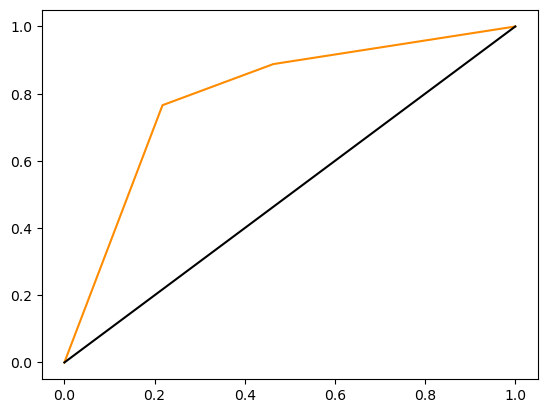

Random Forest


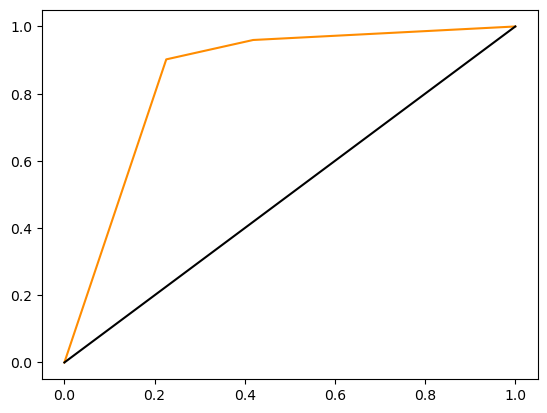

XGBoost


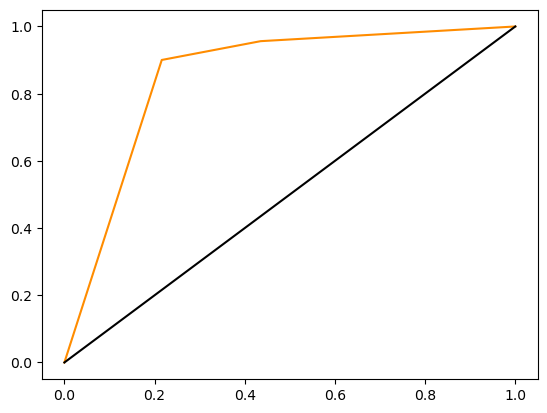

LightGBM


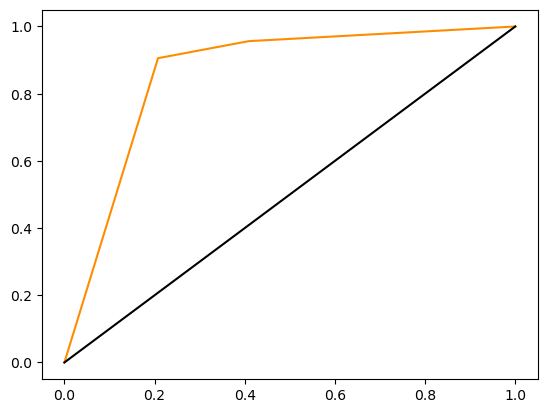

In [58]:
for gg,tt in zip(pred_lst, model_lst):
    print('\33[91m' + tt + '\033[0m')
    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, thresholds = roc_curve(y_test, gg, pos_label=2)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color = 'black', label = 'y = x')
    plt.show()